# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key



In [5]:
# Import citipy to determine the cities based on latitude and longitude
# note to self: calling this module would only work in a seperate cell --
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city = 'brak'
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_url = query_url + city
city_weather =  requests.get(city_url).json()
city_weather

{'coord': {'lon': 14.2714, 'lat': 27.5496},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 29.44,
  'feels_like': 27.7,
  'temp_min': 29.44,
  'temp_max': 29.44,
  'pressure': 1012,
  'humidity': 11,
  'sea_level': 1012,
  'grnd_level': 971},
 'visibility': 10000,
 'wind': {'speed': 7.54, 'deg': 98, 'gust': 7.73},
 'clouds': {'all': 39},
 'dt': 1712848527,
 'sys': {'country': 'LY', 'sunrise': 1712810523, 'sunset': 1712856316},
 'timezone': 7200,
 'id': 2218478,
 'name': 'Brak',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
# url = # YOUR CODE HERE
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country_code = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country_code,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | gosaba
City not found. Skipping...
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | boiro
Processing Record 12 of Set 1 | afaahiti
Processing Record 13 of Set 1 | ressano garcia
Processing Record 14 of Set 1 | tateyama
Processing Record 15 of Set 1 | villarrica
Processing Record 16 of Set 1 | nar'yan-mar
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | santa ana
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.10,97,97,8.00,TF,1712848533
1,punta arenas,-53.1500,-70.9167,9.06,57,20,15.43,CL,1712848516
2,waitangi,-43.9535,-176.5597,16.01,95,15,4.02,NZ,1712848533
3,wailua homesteads,22.0669,-159.3780,22.24,90,20,2.06,US,1712848533
4,adamstown,-25.0660,-130.1015,21.44,70,93,10.76,PN,1712848534


In [13]:
# Export the City_Data into a csv
import os
path = os.path.join("..","output","cities.csv")     # making file path relative others

city_data_df.to_csv(path, index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv(path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.10,97,97,8.00,TF,1712848533
1,punta arenas,-53.1500,-70.9167,9.06,57,20,15.43,CL,1712848516
2,waitangi,-43.9535,-176.5597,16.01,95,15,4.02,NZ,1712848533
3,wailua homesteads,22.0669,-159.3780,22.24,90,20,2.06,US,1712848533
4,adamstown,-25.0660,-130.1015,21.44,70,93,10.76,PN,1712848534


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [16]:
import datetime                         # note to self: could not call the time module; use datetime instead --
# double check the format for displaying on the graph
datetime.datetime.fromtimestamp(city_date).strftime('%Y-%m-%d %H:%M:%S')  # do not need the time --
datetime.datetime.fromtimestamp(city_date).strftime('%Y-%m-%d')

'2024-04-11'

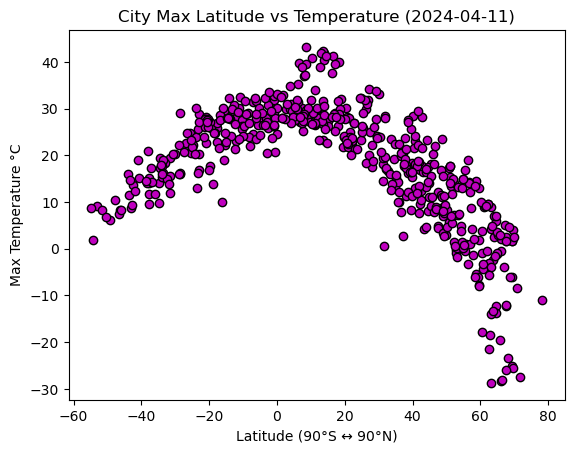

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", color="m", edgecolors = 'k')

# Incorporate the other graph properties
Unix_timestamp_converted = datetime.datetime.fromtimestamp(city_date).strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs Temperature ({Unix_timestamp_converted})")
plt.xlabel("Latitude (90\u00B0S \u2194 90\u00B0N)")
plt.ylabel("Max Temperature \u00B0C")

# Save the figure
path = os.path.join("..","output","Fig1.png")
plt.savefig(path)

# Show plot
plt.show()

#### Latitude Vs. Humidity

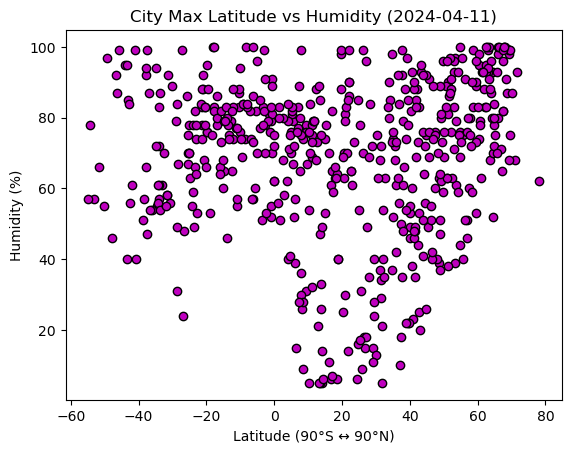

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", color="m", edgecolors = 'k')

# Incorporate the other graph properties
Unix_timestamp_converted = datetime.datetime.fromtimestamp(city_date).strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs Humidity ({Unix_timestamp_converted})")
plt.xlabel("Latitude (90\u00B0S \u2194 90\u00B0N)")
plt.ylabel("Humidity (%)")

# Save the figure
path = os.path.join("..","output","Fig2.png")
plt.savefig(path)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

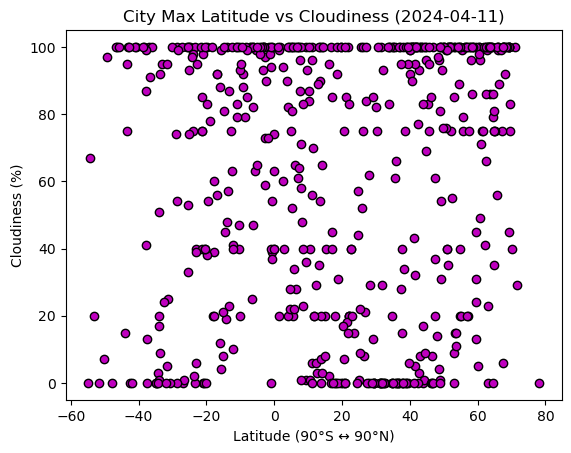

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", color="m", edgecolors = 'k')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Cloudiness ({Unix_timestamp_converted})")
plt.xlabel("Latitude (90\u00B0S \u2194 90\u00B0N)")
plt.ylabel("Cloudiness (%)")

# Save the figure
path = os.path.join("..","output","Fig3.png")
plt.savefig(path)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

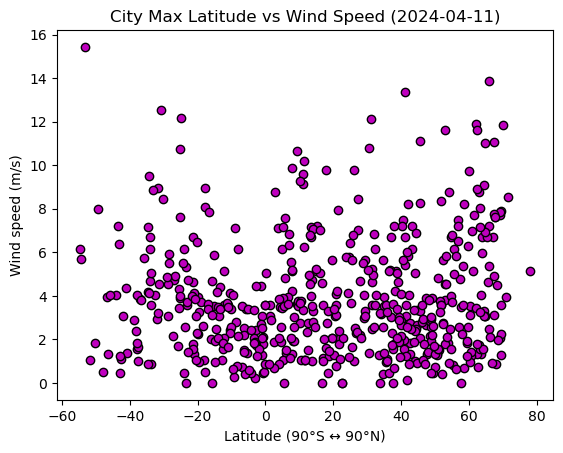

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", color="m", edgecolors = 'k')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Wind Speed ({Unix_timestamp_converted})")
plt.xlabel("Latitude (90\u00B0S \u2194 90\u00B0N)")
plt.ylabel("Wind speed (m/s)")

# Save the figure
path = os.path.join("..","output","Fig4.png")
plt.savefig(path)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
import scipy.stats as st

# the function uses (6) variables: the x,y coordinates of the data for plotting, 
#       x,y coordinates for positioning the regression equation, and labels for the x & y axis  --

def Linear_Regression (x_axis_scatter, y_axis_scatter, eq_x, eq_y, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
    regress_values = x_axis_scatter * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation =st.pearsonr(x_axis_scatter, y_axis_scatter)
    print(f"The r-value is: {rvalue**2}")  
    plt.scatter(x_axis_scatter, y_axis_scatter, marker="o", color="cornflowerblue", edgecolors = 'k')
    plt.plot(x_axis_scatter,regress_values,"r-")
    plt.figtext(eq_x, eq_y, line_eq, fontsize=15, color = "r") 
    plot_title = (f"city latitude vs {y_label} ({Unix_timestamp_converted})")
    plt.title(plot_title)
    plt.xlabel(f"Latitude ({x_label} hemisphere)")
    plt.ylabel(y_label)  

# reference for matplotlib colors: https://en.wikipedia.org/wiki/X11_color_names; go to 'X11 color names' table;
#       take out space in color names with multiple words  --

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,wailua homesteads,22.0669,-159.3780,22.24,90,20,2.06,US,1712848533
5,stanley,54.8680,-1.6985,14.84,76,40,6.69,GB,1712848352
6,jamestown,42.0970,-79.2353,16.80,88,100,8.23,US,1712848507
8,boiro,42.6500,-8.9000,28.12,53,93,1.83,ES,1712848534
11,tateyama,34.9833,139.8667,15.05,74,100,3.54,JP,1712848534


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.10,97,97,8.00,TF,1712848533
1,punta arenas,-53.1500,-70.9167,9.06,57,20,15.43,CL,1712848516
2,waitangi,-43.9535,-176.5597,16.01,95,15,4.02,NZ,1712848533
4,adamstown,-25.0660,-130.1015,21.44,70,93,10.76,PN,1712848534
7,mount gambier,-37.8333,140.7667,11.69,66,87,1.54,AU,1712848532


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7284970075717684


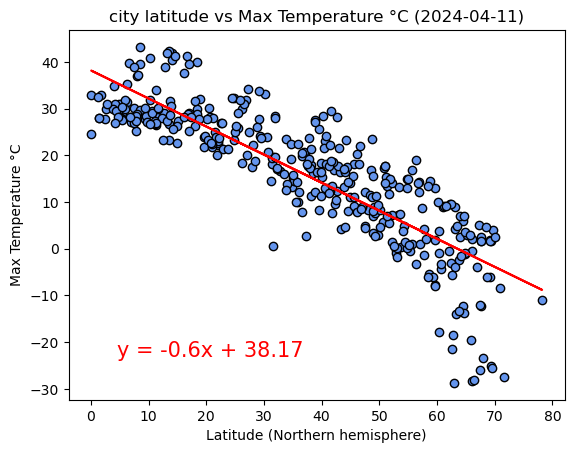

In [25]:
# Linear regression on Northern Hemisphere
x_axis_scatter = northern_hemi_df['Lat'] 
y_axis_scatter = northern_hemi_df['Max Temp']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.2, 0.2, "Northern", "Max Temperature \u00B0C")

The r-value is: 0.6947002492767059


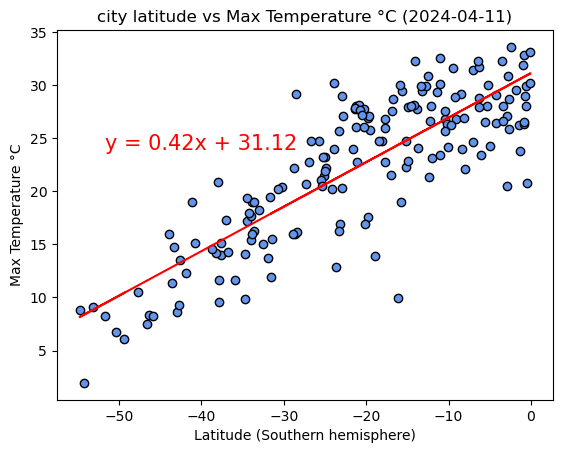

In [26]:
# Linear regression on Southern Hemisphere
x_axis_scatter = southern_hemi_df['Lat'] 
y_axis_scatter = southern_hemi_df['Max Temp']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.2, 0.63, "Southern", "Max Temperature \u00B0C")

**Discussion about the linear relationship:** 
The data analysis shows that there is a strong relationship between latitude and temperature, for both Northern and Southern hemispheres. Because the correlation is strong, the linear relationship equations between latitude and temperature displayed in red on the graphs are valid. The r-value is slightly higher in the Northern hemisphere, perhaps the reason for this is that there is more data and a wider range of latitudes in the Northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1259204022553347


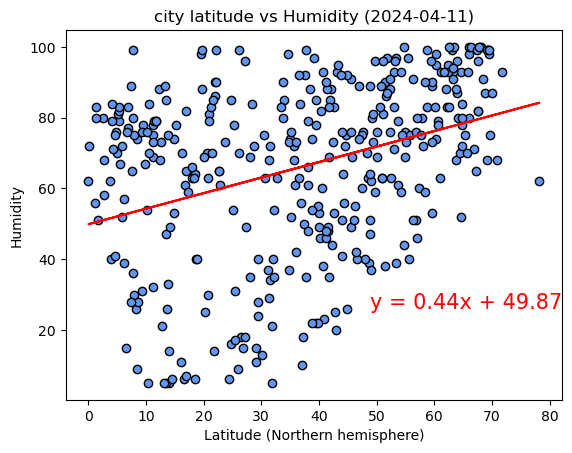

In [30]:
# Northern Hemisphere
x_axis_scatter = northern_hemi_df['Lat'] 
y_axis_scatter = northern_hemi_df['Humidity']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.6, 0.3, "Northern", "Humidity")

The r-value is: 0.0293669236074611


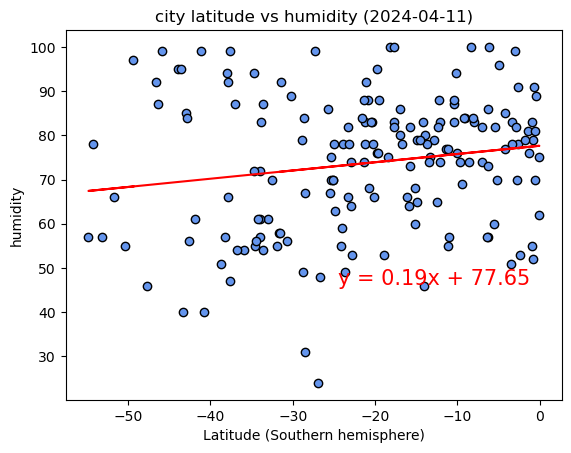

In [31]:
# Southern Hemisphere
x_axis_scatter = southern_hemi_df['Lat'] 
y_axis_scatter = southern_hemi_df["Humidity"]
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.55, 0.35, "Southern", "humidity")

**Discussion about the linear relationship:** 
The data shows that there is a poor relationship between latitude and humidity, for both Northern and Southern hemispheres. Because the correlation is poor, the linear relationship equations between latitude and humidity displayed in red on the graphs are unconvincing. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.044713151648261396


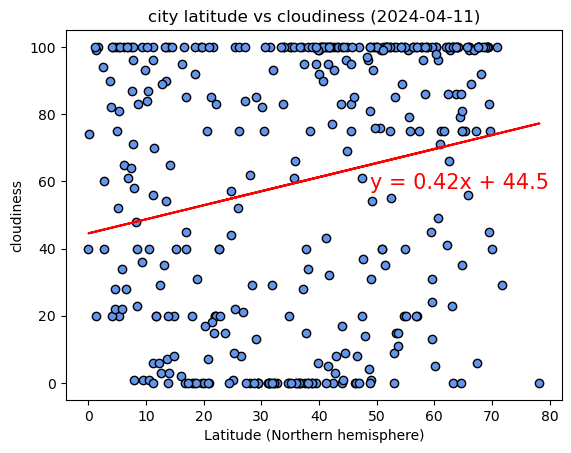

In [32]:
# Northern Hemisphere
x_axis_scatter = northern_hemi_df['Lat'] 
y_axis_scatter = northern_hemi_df['Cloudiness']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.6, 0.55, "Northern", "cloudiness")

The r-value is: 0.059813804918152566


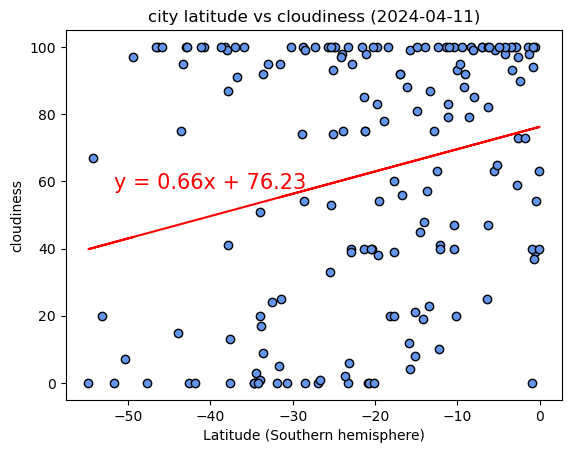

In [34]:
# Southern Hemisphere
x_axis_scatter = southern_hemi_df['Lat'] 
y_axis_scatter = southern_hemi_df['Cloudiness']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.2, 0.55, "Southern", "cloudiness")

**Discussion about the linear relationship:** 
The data shows that there is a poor relationship between latitude and cloudiness, for both Northern and Southern hemispheres. Because the correlation is poor, with r-values close to zero, the linear relationship equations between latitude and cloudiness displayed in red on the graphs are not really credible. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009997044730865691


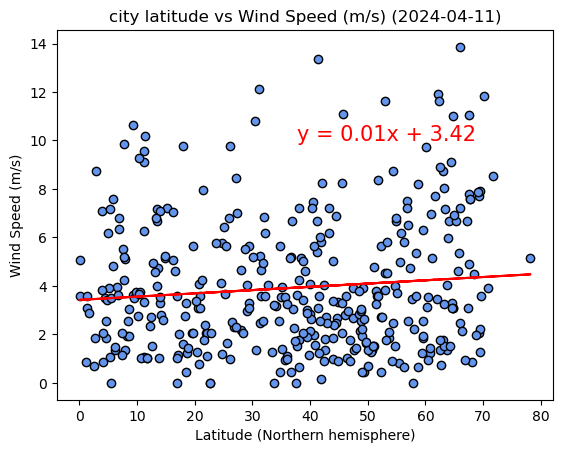

In [36]:
# Northern Hemisphere
x_axis_scatter = northern_hemi_df['Lat'] 
y_axis_scatter = northern_hemi_df['Wind Speed']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.5, 0.65, "Northern", "Wind Speed (m/s)")

The r-value is: 0.10391161929515438


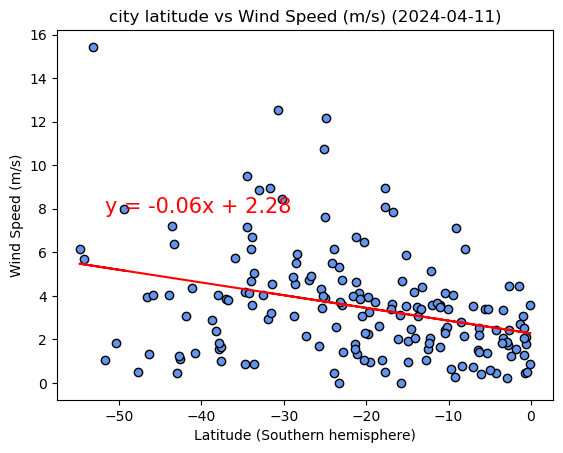

In [39]:
# Southern Hemisphere
x_axis_scatter = southern_hemi_df['Lat'] 
y_axis_scatter = southern_hemi_df['Wind Speed']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.2, 0.5, "Southern", "Wind Speed (m/s)")

**Discussion about the linear relationship:** 
The data shows that there is a poor relationship between latitude and wind speed, for both Northern and Southern hemispheres. Because the correlation is poor, with r-values close to zero, the linear relationship equations between latitude and wind speed displayed in red on the graphs are not really valid. 